In [14]:
import sys, os #imp
sys.path.append('..')
import pandas as pd
import yaml
import backtesting as bt
import matplotlib.pyplot as plt
import numpy as np
from tools.instruments import instruments
from tools.display import highchart

In [16]:
%load_ext autoreload
%aimport backtesting.system
%aimport backtesting.trader
%aimport tools.quotes
%aimport backtesting.trades
%aimport tools.display
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
with open('systems/pricedensity.yaml', encoding='utf-8') as f:
    system1 = yaml.load(f, Loader=yaml.FullLoader)
    print(system1)

{'name': 'emacross', 'description': '시스템 설명', 'sectors': 'default', 'instruments': ['BO', 'C', 'CC', 'CL', 'CT', 'ES', 'FV', 'GC', 'HG', 'HO', 'KC', 'LC', 'LN', 'MD', 'NG', 'NK', 'NQ', 'O', 'OJ', 'PA', 'PL', 'RB', 'RTY', 'S', 'SB', 'SI', 'SM', 'TU', 'TY', 'US', 'W'], 'from_date': '1999-01-01', 'to_date': None, 'principal': 10000000, 'heat_system': 'DefaultHeat', 'max_system_heat': 0.3, 'max_sector_heat': 0.05, 'max_trade_heat': 0.02, 'max_lots': 5, 'commission': 2.99, 'skid': 20, 'allow_pyramiding': False, 'metrics': [['pd25', 'PD', 'percentile=25'], ['pd75', 'PD', 'percentile=75'], ['pd50', 'PD', 'percentile=50']], 'entry_rule': {'long': 'close>pd75', 'short': 'close<pd25'}, 'exit_rule': {'long': 'close < pd50', 'short': 'close > pd50'}, 'stop_rule': {'long': 'pd50', 'short': 'pd50'}}


In [43]:
trader = bt.Trader(systems=[system1])
system = trader.systems[0]
trader.run()

매매시작
거래일: 1999-01-04 00:00:00, 시스템: emacross
거래일: 1999-01-05 00:00:00, 시스템: emacross
거래일: 1999-01-06 00:00:00, 시스템: emacross
거래일: 1999-01-07 00:00:00, 시스템: emacross
거래일: 1999-01-08 00:00:00, 시스템: emacross
거래일: 1999-01-11 00:00:00, 시스템: emacross
거래일: 1999-01-12 00:00:00, 시스템: emacross
거래일: 1999-01-13 00:00:00, 시스템: emacross
거래일: 1999-01-14 00:00:00, 시스템: emacross
거래일: 1999-01-15 00:00:00, 시스템: emacross
거래일: 1999-01-18 00:00:00, 시스템: emacross
거래일: 1999-01-19 00:00:00, 시스템: emacross
거래일: 1999-01-20 00:00:00, 시스템: emacross
거래일: 1999-01-21 00:00:00, 시스템: emacross
거래일: 1999-01-22 00:00:00, 시스템: emacross
거래일: 1999-01-25 00:00:00, 시스템: emacross
거래일: 1999-01-26 00:00:00, 시스템: emacross
거래일: 1999-01-27 00:00:00, 시스템: emacross
거래일: 1999-01-28 00:00:00, 시스템: emacross
거래일: 1999-01-29 00:00:00, 시스템: emacross
거래일: 1999-02-01 00:00:00, 시스템: emacross
거래일: 1999-02-02 00:00:00, 시스템: emacross
거래일: 1999-02-03 00:00:00, 시스템: emacross
거래일: 1999-02-04 00:00:00, 시스템: emacross
거래일: 1999-02-05 00:00:00, 시스템: emac

거래일: 1999-10-18 00:00:00, 시스템: emacross
거래일: 1999-10-19 00:00:00, 시스템: emacross
거래일: 1999-10-20 00:00:00, 시스템: emacross
거래일: 1999-10-21 00:00:00, 시스템: emacross
거래일: 1999-10-22 00:00:00, 시스템: emacross
거래일: 1999-10-25 00:00:00, 시스템: emacross
거래일: 1999-10-26 00:00:00, 시스템: emacross
거래일: 1999-10-27 00:00:00, 시스템: emacross
거래일: 1999-10-28 00:00:00, 시스템: emacross
거래일: 1999-10-29 00:00:00, 시스템: emacross
거래일: 1999-11-01 00:00:00, 시스템: emacross
거래일: 1999-11-02 00:00:00, 시스템: emacross
거래일: 1999-11-03 00:00:00, 시스템: emacross
거래일: 1999-11-04 00:00:00, 시스템: emacross
거래일: 1999-11-05 00:00:00, 시스템: emacross
거래일: 1999-11-08 00:00:00, 시스템: emacross
거래일: 1999-11-09 00:00:00, 시스템: emacross
거래일: 1999-11-10 00:00:00, 시스템: emacross
거래일: 1999-11-11 00:00:00, 시스템: emacross
거래일: 1999-11-12 00:00:00, 시스템: emacross
거래일: 1999-11-15 00:00:00, 시스템: emacross
거래일: 1999-11-16 00:00:00, 시스템: emacross
거래일: 1999-11-17 00:00:00, 시스템: emacross
거래일: 1999-11-18 00:00:00, 시스템: emacross
거래일: 1999-11-19 00:00:00, 시스템: emacross


거래일: 2000-08-11 00:00:00, 시스템: emacross
거래일: 2000-08-14 00:00:00, 시스템: emacross
거래일: 2000-08-15 00:00:00, 시스템: emacross
거래일: 2000-08-16 00:00:00, 시스템: emacross
거래일: 2000-08-17 00:00:00, 시스템: emacross
거래일: 2000-08-18 00:00:00, 시스템: emacross
거래일: 2000-08-21 00:00:00, 시스템: emacross
거래일: 2000-08-22 00:00:00, 시스템: emacross
거래일: 2000-08-23 00:00:00, 시스템: emacross
거래일: 2000-08-24 00:00:00, 시스템: emacross
거래일: 2000-08-25 00:00:00, 시스템: emacross
거래일: 2000-08-28 00:00:00, 시스템: emacross
거래일: 2000-08-29 00:00:00, 시스템: emacross
거래일: 2000-08-30 00:00:00, 시스템: emacross
거래일: 2000-08-31 00:00:00, 시스템: emacross
거래일: 2000-09-01 00:00:00, 시스템: emacross
거래일: 2000-09-04 00:00:00, 시스템: emacross
거래일: 2000-09-05 00:00:00, 시스템: emacross
거래일: 2000-09-06 00:00:00, 시스템: emacross
거래일: 2000-09-07 00:00:00, 시스템: emacross
거래일: 2000-09-08 00:00:00, 시스템: emacross
거래일: 2000-09-11 00:00:00, 시스템: emacross
거래일: 2000-09-12 00:00:00, 시스템: emacross
거래일: 2000-09-13 00:00:00, 시스템: emacross
거래일: 2000-09-14 00:00:00, 시스템: emacross


거래일: 2001-06-05 00:00:00, 시스템: emacross
거래일: 2001-06-06 00:00:00, 시스템: emacross
거래일: 2001-06-07 00:00:00, 시스템: emacross
거래일: 2001-06-08 00:00:00, 시스템: emacross
거래일: 2001-06-11 00:00:00, 시스템: emacross
거래일: 2001-06-12 00:00:00, 시스템: emacross
거래일: 2001-06-13 00:00:00, 시스템: emacross
거래일: 2001-06-14 00:00:00, 시스템: emacross
거래일: 2001-06-15 00:00:00, 시스템: emacross
거래일: 2001-06-18 00:00:00, 시스템: emacross
거래일: 2001-06-19 00:00:00, 시스템: emacross
거래일: 2001-06-20 00:00:00, 시스템: emacross
거래일: 2001-06-21 00:00:00, 시스템: emacross
거래일: 2001-06-22 00:00:00, 시스템: emacross
거래일: 2001-06-25 00:00:00, 시스템: emacross
거래일: 2001-06-26 00:00:00, 시스템: emacross
거래일: 2001-06-27 00:00:00, 시스템: emacross
거래일: 2001-06-28 00:00:00, 시스템: emacross
거래일: 2001-06-29 00:00:00, 시스템: emacross
거래일: 2001-07-02 00:00:00, 시스템: emacross
거래일: 2001-07-03 00:00:00, 시스템: emacross
거래일: 2001-07-04 00:00:00, 시스템: emacross
거래일: 2001-07-05 00:00:00, 시스템: emacross
거래일: 2001-07-06 00:00:00, 시스템: emacross
거래일: 2001-07-09 00:00:00, 시스템: emacross


거래일: 2002-04-09 00:00:00, 시스템: emacross
거래일: 2002-04-10 00:00:00, 시스템: emacross
거래일: 2002-04-11 00:00:00, 시스템: emacross
거래일: 2002-04-12 00:00:00, 시스템: emacross
거래일: 2002-04-15 00:00:00, 시스템: emacross
거래일: 2002-04-16 00:00:00, 시스템: emacross
거래일: 2002-04-17 00:00:00, 시스템: emacross
거래일: 2002-04-18 00:00:00, 시스템: emacross
거래일: 2002-04-19 00:00:00, 시스템: emacross
거래일: 2002-04-22 00:00:00, 시스템: emacross
거래일: 2002-04-23 00:00:00, 시스템: emacross
거래일: 2002-04-24 00:00:00, 시스템: emacross
거래일: 2002-04-25 00:00:00, 시스템: emacross
거래일: 2002-04-26 00:00:00, 시스템: emacross
거래일: 2002-04-29 00:00:00, 시스템: emacross
거래일: 2002-04-30 00:00:00, 시스템: emacross
거래일: 2002-05-01 00:00:00, 시스템: emacross
거래일: 2002-05-02 00:00:00, 시스템: emacross
거래일: 2002-05-03 00:00:00, 시스템: emacross
거래일: 2002-05-06 00:00:00, 시스템: emacross
거래일: 2002-05-07 00:00:00, 시스템: emacross
거래일: 2002-05-08 00:00:00, 시스템: emacross
거래일: 2002-05-09 00:00:00, 시스템: emacross
거래일: 2002-05-10 00:00:00, 시스템: emacross
거래일: 2002-05-13 00:00:00, 시스템: emacross


거래일: 2003-01-24 00:00:00, 시스템: emacross
거래일: 2003-01-27 00:00:00, 시스템: emacross
거래일: 2003-01-28 00:00:00, 시스템: emacross
거래일: 2003-01-29 00:00:00, 시스템: emacross
거래일: 2003-01-30 00:00:00, 시스템: emacross
거래일: 2003-01-31 00:00:00, 시스템: emacross
거래일: 2003-02-03 00:00:00, 시스템: emacross
거래일: 2003-02-04 00:00:00, 시스템: emacross
거래일: 2003-02-05 00:00:00, 시스템: emacross
거래일: 2003-02-06 00:00:00, 시스템: emacross
거래일: 2003-02-07 00:00:00, 시스템: emacross
거래일: 2003-02-10 00:00:00, 시스템: emacross
거래일: 2003-02-11 00:00:00, 시스템: emacross
거래일: 2003-02-12 00:00:00, 시스템: emacross
거래일: 2003-02-13 00:00:00, 시스템: emacross
거래일: 2003-02-14 00:00:00, 시스템: emacross
거래일: 2003-02-17 00:00:00, 시스템: emacross
거래일: 2003-02-18 00:00:00, 시스템: emacross
거래일: 2003-02-19 00:00:00, 시스템: emacross
거래일: 2003-02-20 00:00:00, 시스템: emacross
거래일: 2003-02-21 00:00:00, 시스템: emacross
거래일: 2003-02-24 00:00:00, 시스템: emacross
거래일: 2003-02-25 00:00:00, 시스템: emacross
거래일: 2003-02-26 00:00:00, 시스템: emacross
거래일: 2003-02-27 00:00:00, 시스템: emacross


거래일: 2003-11-24 00:00:00, 시스템: emacross
거래일: 2003-11-25 00:00:00, 시스템: emacross
거래일: 2003-11-26 00:00:00, 시스템: emacross
거래일: 2003-11-27 00:00:00, 시스템: emacross
거래일: 2003-11-28 00:00:00, 시스템: emacross
거래일: 2003-12-01 00:00:00, 시스템: emacross
거래일: 2003-12-02 00:00:00, 시스템: emacross
거래일: 2003-12-03 00:00:00, 시스템: emacross
거래일: 2003-12-04 00:00:00, 시스템: emacross
거래일: 2003-12-05 00:00:00, 시스템: emacross
거래일: 2003-12-08 00:00:00, 시스템: emacross
거래일: 2003-12-09 00:00:00, 시스템: emacross
거래일: 2003-12-10 00:00:00, 시스템: emacross
거래일: 2003-12-11 00:00:00, 시스템: emacross
거래일: 2003-12-12 00:00:00, 시스템: emacross
거래일: 2003-12-15 00:00:00, 시스템: emacross
거래일: 2003-12-16 00:00:00, 시스템: emacross
거래일: 2003-12-17 00:00:00, 시스템: emacross
거래일: 2003-12-18 00:00:00, 시스템: emacross
거래일: 2003-12-19 00:00:00, 시스템: emacross
거래일: 2003-12-22 00:00:00, 시스템: emacross
거래일: 2003-12-23 00:00:00, 시스템: emacross
거래일: 2003-12-24 00:00:00, 시스템: emacross
거래일: 2003-12-26 00:00:00, 시스템: emacross
거래일: 2003-12-29 00:00:00, 시스템: emacross


거래일: 2004-09-16 00:00:00, 시스템: emacross
거래일: 2004-09-17 00:00:00, 시스템: emacross
거래일: 2004-09-20 00:00:00, 시스템: emacross
거래일: 2004-09-21 00:00:00, 시스템: emacross
거래일: 2004-09-22 00:00:00, 시스템: emacross
거래일: 2004-09-23 00:00:00, 시스템: emacross
거래일: 2004-09-24 00:00:00, 시스템: emacross
거래일: 2004-09-27 00:00:00, 시스템: emacross
거래일: 2004-09-28 00:00:00, 시스템: emacross
거래일: 2004-09-29 00:00:00, 시스템: emacross
거래일: 2004-09-30 00:00:00, 시스템: emacross
거래일: 2004-10-01 00:00:00, 시스템: emacross
거래일: 2004-10-04 00:00:00, 시스템: emacross
거래일: 2004-10-05 00:00:00, 시스템: emacross
거래일: 2004-10-06 00:00:00, 시스템: emacross
거래일: 2004-10-07 00:00:00, 시스템: emacross
거래일: 2004-10-08 00:00:00, 시스템: emacross
거래일: 2004-10-11 00:00:00, 시스템: emacross
거래일: 2004-10-12 00:00:00, 시스템: emacross
거래일: 2004-10-13 00:00:00, 시스템: emacross
거래일: 2004-10-14 00:00:00, 시스템: emacross
거래일: 2004-10-15 00:00:00, 시스템: emacross
거래일: 2004-10-18 00:00:00, 시스템: emacross
거래일: 2004-10-19 00:00:00, 시스템: emacross
거래일: 2004-10-20 00:00:00, 시스템: emacross


거래일: 2005-07-13 00:00:00, 시스템: emacross
거래일: 2005-07-14 00:00:00, 시스템: emacross
거래일: 2005-07-15 00:00:00, 시스템: emacross
거래일: 2005-07-18 00:00:00, 시스템: emacross
거래일: 2005-07-19 00:00:00, 시스템: emacross
거래일: 2005-07-20 00:00:00, 시스템: emacross
거래일: 2005-07-21 00:00:00, 시스템: emacross
거래일: 2005-07-22 00:00:00, 시스템: emacross
거래일: 2005-07-25 00:00:00, 시스템: emacross
거래일: 2005-07-26 00:00:00, 시스템: emacross
거래일: 2005-07-27 00:00:00, 시스템: emacross
거래일: 2005-07-28 00:00:00, 시스템: emacross
거래일: 2005-07-29 00:00:00, 시스템: emacross
거래일: 2005-08-01 00:00:00, 시스템: emacross
거래일: 2005-08-02 00:00:00, 시스템: emacross
거래일: 2005-08-03 00:00:00, 시스템: emacross
거래일: 2005-08-04 00:00:00, 시스템: emacross
거래일: 2005-08-05 00:00:00, 시스템: emacross
거래일: 2005-08-08 00:00:00, 시스템: emacross
거래일: 2005-08-09 00:00:00, 시스템: emacross
거래일: 2005-08-10 00:00:00, 시스템: emacross
거래일: 2005-08-11 00:00:00, 시스템: emacross
거래일: 2005-08-12 00:00:00, 시스템: emacross
거래일: 2005-08-15 00:00:00, 시스템: emacross
거래일: 2005-08-16 00:00:00, 시스템: emacross


거래일: 2006-05-03 00:00:00, 시스템: emacross
거래일: 2006-05-04 00:00:00, 시스템: emacross
거래일: 2006-05-05 00:00:00, 시스템: emacross
거래일: 2006-05-08 00:00:00, 시스템: emacross
거래일: 2006-05-09 00:00:00, 시스템: emacross
거래일: 2006-05-10 00:00:00, 시스템: emacross
거래일: 2006-05-11 00:00:00, 시스템: emacross
거래일: 2006-05-12 00:00:00, 시스템: emacross
거래일: 2006-05-15 00:00:00, 시스템: emacross
거래일: 2006-05-16 00:00:00, 시스템: emacross
거래일: 2006-05-17 00:00:00, 시스템: emacross
거래일: 2006-05-18 00:00:00, 시스템: emacross
거래일: 2006-05-19 00:00:00, 시스템: emacross
거래일: 2006-05-22 00:00:00, 시스템: emacross
거래일: 2006-05-23 00:00:00, 시스템: emacross
거래일: 2006-05-24 00:00:00, 시스템: emacross
거래일: 2006-05-25 00:00:00, 시스템: emacross
거래일: 2006-05-26 00:00:00, 시스템: emacross
거래일: 2006-05-29 00:00:00, 시스템: emacross
거래일: 2006-05-30 00:00:00, 시스템: emacross
거래일: 2006-05-31 00:00:00, 시스템: emacross
거래일: 2006-06-01 00:00:00, 시스템: emacross
거래일: 2006-06-02 00:00:00, 시스템: emacross
거래일: 2006-06-05 00:00:00, 시스템: emacross
거래일: 2006-06-06 00:00:00, 시스템: emacross


거래일: 2007-03-02 00:00:00, 시스템: emacross
거래일: 2007-03-05 00:00:00, 시스템: emacross
거래일: 2007-03-06 00:00:00, 시스템: emacross
거래일: 2007-03-07 00:00:00, 시스템: emacross
거래일: 2007-03-08 00:00:00, 시스템: emacross
거래일: 2007-03-09 00:00:00, 시스템: emacross
거래일: 2007-03-12 00:00:00, 시스템: emacross
거래일: 2007-03-13 00:00:00, 시스템: emacross
거래일: 2007-03-14 00:00:00, 시스템: emacross
거래일: 2007-03-15 00:00:00, 시스템: emacross
거래일: 2007-03-16 00:00:00, 시스템: emacross
거래일: 2007-03-19 00:00:00, 시스템: emacross
거래일: 2007-03-20 00:00:00, 시스템: emacross
거래일: 2007-03-21 00:00:00, 시스템: emacross
거래일: 2007-03-22 00:00:00, 시스템: emacross
거래일: 2007-03-23 00:00:00, 시스템: emacross
거래일: 2007-03-26 00:00:00, 시스템: emacross
거래일: 2007-03-27 00:00:00, 시스템: emacross
거래일: 2007-03-28 00:00:00, 시스템: emacross
거래일: 2007-03-29 00:00:00, 시스템: emacross
거래일: 2007-03-30 00:00:00, 시스템: emacross
거래일: 2007-04-02 00:00:00, 시스템: emacross
거래일: 2007-04-03 00:00:00, 시스템: emacross
거래일: 2007-04-04 00:00:00, 시스템: emacross
거래일: 2007-04-05 00:00:00, 시스템: emacross


거래일: 2007-12-18 00:00:00, 시스템: emacross
거래일: 2007-12-19 00:00:00, 시스템: emacross
거래일: 2007-12-20 00:00:00, 시스템: emacross
거래일: 2007-12-21 00:00:00, 시스템: emacross
거래일: 2007-12-24 00:00:00, 시스템: emacross
거래일: 2007-12-26 00:00:00, 시스템: emacross
거래일: 2007-12-27 00:00:00, 시스템: emacross
거래일: 2007-12-28 00:00:00, 시스템: emacross
거래일: 2007-12-31 00:00:00, 시스템: emacross
거래일: 2008-01-02 00:00:00, 시스템: emacross
거래일: 2008-01-03 00:00:00, 시스템: emacross
거래일: 2008-01-04 00:00:00, 시스템: emacross
거래일: 2008-01-07 00:00:00, 시스템: emacross
거래일: 2008-01-08 00:00:00, 시스템: emacross
거래일: 2008-01-09 00:00:00, 시스템: emacross
거래일: 2008-01-10 00:00:00, 시스템: emacross
거래일: 2008-01-11 00:00:00, 시스템: emacross
거래일: 2008-01-14 00:00:00, 시스템: emacross
거래일: 2008-01-15 00:00:00, 시스템: emacross
거래일: 2008-01-16 00:00:00, 시스템: emacross
거래일: 2008-01-17 00:00:00, 시스템: emacross
거래일: 2008-01-18 00:00:00, 시스템: emacross
거래일: 2008-01-21 00:00:00, 시스템: emacross
거래일: 2008-01-22 00:00:00, 시스템: emacross
거래일: 2008-01-23 00:00:00, 시스템: emacross


거래일: 2008-10-09 00:00:00, 시스템: emacross
거래일: 2008-10-10 00:00:00, 시스템: emacross
거래일: 2008-10-13 00:00:00, 시스템: emacross
거래일: 2008-10-14 00:00:00, 시스템: emacross
거래일: 2008-10-15 00:00:00, 시스템: emacross
거래일: 2008-10-16 00:00:00, 시스템: emacross
거래일: 2008-10-17 00:00:00, 시스템: emacross
거래일: 2008-10-20 00:00:00, 시스템: emacross
거래일: 2008-10-21 00:00:00, 시스템: emacross
거래일: 2008-10-22 00:00:00, 시스템: emacross
거래일: 2008-10-23 00:00:00, 시스템: emacross
거래일: 2008-10-24 00:00:00, 시스템: emacross
거래일: 2008-10-27 00:00:00, 시스템: emacross
거래일: 2008-10-28 00:00:00, 시스템: emacross
거래일: 2008-10-29 00:00:00, 시스템: emacross
거래일: 2008-10-30 00:00:00, 시스템: emacross
거래일: 2008-10-31 00:00:00, 시스템: emacross
거래일: 2008-11-03 00:00:00, 시스템: emacross
거래일: 2008-11-04 00:00:00, 시스템: emacross
거래일: 2008-11-05 00:00:00, 시스템: emacross
거래일: 2008-11-06 00:00:00, 시스템: emacross
거래일: 2008-11-07 00:00:00, 시스템: emacross
거래일: 2008-11-10 00:00:00, 시스템: emacross
거래일: 2008-11-11 00:00:00, 시스템: emacross
거래일: 2008-11-12 00:00:00, 시스템: emacross


거래일: 2009-07-28 00:00:00, 시스템: emacross
거래일: 2009-07-29 00:00:00, 시스템: emacross
거래일: 2009-07-30 00:00:00, 시스템: emacross
거래일: 2009-07-31 00:00:00, 시스템: emacross
거래일: 2009-08-03 00:00:00, 시스템: emacross
거래일: 2009-08-04 00:00:00, 시스템: emacross
거래일: 2009-08-05 00:00:00, 시스템: emacross
거래일: 2009-08-06 00:00:00, 시스템: emacross
거래일: 2009-08-07 00:00:00, 시스템: emacross
거래일: 2009-08-10 00:00:00, 시스템: emacross
거래일: 2009-08-11 00:00:00, 시스템: emacross
거래일: 2009-08-12 00:00:00, 시스템: emacross
거래일: 2009-08-13 00:00:00, 시스템: emacross
거래일: 2009-08-14 00:00:00, 시스템: emacross
거래일: 2009-08-17 00:00:00, 시스템: emacross
거래일: 2009-08-18 00:00:00, 시스템: emacross
거래일: 2009-08-19 00:00:00, 시스템: emacross
거래일: 2009-08-20 00:00:00, 시스템: emacross
거래일: 2009-08-21 00:00:00, 시스템: emacross
거래일: 2009-08-24 00:00:00, 시스템: emacross
거래일: 2009-08-25 00:00:00, 시스템: emacross
거래일: 2009-08-26 00:00:00, 시스템: emacross
거래일: 2009-08-27 00:00:00, 시스템: emacross
거래일: 2009-08-28 00:00:00, 시스템: emacross
거래일: 2009-08-31 00:00:00, 시스템: emacross


거래일: 2010-05-18 00:00:00, 시스템: emacross
거래일: 2010-05-19 00:00:00, 시스템: emacross
거래일: 2010-05-20 00:00:00, 시스템: emacross
거래일: 2010-05-21 00:00:00, 시스템: emacross
거래일: 2010-05-24 00:00:00, 시스템: emacross
거래일: 2010-05-25 00:00:00, 시스템: emacross
거래일: 2010-05-26 00:00:00, 시스템: emacross
거래일: 2010-05-27 00:00:00, 시스템: emacross
거래일: 2010-05-28 00:00:00, 시스템: emacross
거래일: 2010-05-31 00:00:00, 시스템: emacross
거래일: 2010-06-01 00:00:00, 시스템: emacross
거래일: 2010-06-02 00:00:00, 시스템: emacross
거래일: 2010-06-03 00:00:00, 시스템: emacross
거래일: 2010-06-04 00:00:00, 시스템: emacross
거래일: 2010-06-07 00:00:00, 시스템: emacross
거래일: 2010-06-08 00:00:00, 시스템: emacross
거래일: 2010-06-09 00:00:00, 시스템: emacross
거래일: 2010-06-10 00:00:00, 시스템: emacross
거래일: 2010-06-11 00:00:00, 시스템: emacross
거래일: 2010-06-14 00:00:00, 시스템: emacross
거래일: 2010-06-15 00:00:00, 시스템: emacross
거래일: 2010-06-16 00:00:00, 시스템: emacross
거래일: 2010-06-17 00:00:00, 시스템: emacross
거래일: 2010-06-18 00:00:00, 시스템: emacross
거래일: 2010-06-21 00:00:00, 시스템: emacross


거래일: 2011-03-02 00:00:00, 시스템: emacross
거래일: 2011-03-03 00:00:00, 시스템: emacross
거래일: 2011-03-04 00:00:00, 시스템: emacross
거래일: 2011-03-07 00:00:00, 시스템: emacross
거래일: 2011-03-08 00:00:00, 시스템: emacross
거래일: 2011-03-09 00:00:00, 시스템: emacross
거래일: 2011-03-10 00:00:00, 시스템: emacross
거래일: 2011-03-11 00:00:00, 시스템: emacross
거래일: 2011-03-14 00:00:00, 시스템: emacross
거래일: 2011-03-15 00:00:00, 시스템: emacross
거래일: 2011-03-16 00:00:00, 시스템: emacross
거래일: 2011-03-17 00:00:00, 시스템: emacross
거래일: 2011-03-18 00:00:00, 시스템: emacross
거래일: 2011-03-21 00:00:00, 시스템: emacross
거래일: 2011-03-22 00:00:00, 시스템: emacross
거래일: 2011-03-23 00:00:00, 시스템: emacross
거래일: 2011-03-24 00:00:00, 시스템: emacross
거래일: 2011-03-25 00:00:00, 시스템: emacross
거래일: 2011-03-28 00:00:00, 시스템: emacross
거래일: 2011-03-29 00:00:00, 시스템: emacross
거래일: 2011-03-30 00:00:00, 시스템: emacross
거래일: 2011-03-31 00:00:00, 시스템: emacross
거래일: 2011-04-01 00:00:00, 시스템: emacross
거래일: 2011-04-04 00:00:00, 시스템: emacross
거래일: 2011-04-05 00:00:00, 시스템: emacross


거래일: 2011-12-29 00:00:00, 시스템: emacross
거래일: 2011-12-30 00:00:00, 시스템: emacross
거래일: 2012-01-03 00:00:00, 시스템: emacross
거래일: 2012-01-04 00:00:00, 시스템: emacross
거래일: 2012-01-05 00:00:00, 시스템: emacross
거래일: 2012-01-06 00:00:00, 시스템: emacross
거래일: 2012-01-09 00:00:00, 시스템: emacross
거래일: 2012-01-10 00:00:00, 시스템: emacross
거래일: 2012-01-11 00:00:00, 시스템: emacross
거래일: 2012-01-12 00:00:00, 시스템: emacross
거래일: 2012-01-13 00:00:00, 시스템: emacross
거래일: 2012-01-16 00:00:00, 시스템: emacross
거래일: 2012-01-17 00:00:00, 시스템: emacross
거래일: 2012-01-18 00:00:00, 시스템: emacross
거래일: 2012-01-19 00:00:00, 시스템: emacross
거래일: 2012-01-20 00:00:00, 시스템: emacross
거래일: 2012-01-23 00:00:00, 시스템: emacross
거래일: 2012-01-24 00:00:00, 시스템: emacross
거래일: 2012-01-25 00:00:00, 시스템: emacross
거래일: 2012-01-26 00:00:00, 시스템: emacross
거래일: 2012-01-27 00:00:00, 시스템: emacross
거래일: 2012-01-30 00:00:00, 시스템: emacross
거래일: 2012-01-31 00:00:00, 시스템: emacross
거래일: 2012-02-01 00:00:00, 시스템: emacross
거래일: 2012-02-02 00:00:00, 시스템: emacross


거래일: 2012-10-18 00:00:00, 시스템: emacross
거래일: 2012-10-19 00:00:00, 시스템: emacross
거래일: 2012-10-22 00:00:00, 시스템: emacross
거래일: 2012-10-23 00:00:00, 시스템: emacross
거래일: 2012-10-24 00:00:00, 시스템: emacross
거래일: 2012-10-25 00:00:00, 시스템: emacross
거래일: 2012-10-26 00:00:00, 시스템: emacross
거래일: 2012-10-29 00:00:00, 시스템: emacross
거래일: 2012-10-30 00:00:00, 시스템: emacross
거래일: 2012-10-31 00:00:00, 시스템: emacross
거래일: 2012-11-01 00:00:00, 시스템: emacross
거래일: 2012-11-02 00:00:00, 시스템: emacross
거래일: 2012-11-05 00:00:00, 시스템: emacross
거래일: 2012-11-06 00:00:00, 시스템: emacross
거래일: 2012-11-07 00:00:00, 시스템: emacross
거래일: 2012-11-08 00:00:00, 시스템: emacross
거래일: 2012-11-09 00:00:00, 시스템: emacross
거래일: 2012-11-12 00:00:00, 시스템: emacross
거래일: 2012-11-13 00:00:00, 시스템: emacross
거래일: 2012-11-14 00:00:00, 시스템: emacross
거래일: 2012-11-15 00:00:00, 시스템: emacross
거래일: 2012-11-16 00:00:00, 시스템: emacross
거래일: 2012-11-19 00:00:00, 시스템: emacross
거래일: 2012-11-20 00:00:00, 시스템: emacross
거래일: 2012-11-21 00:00:00, 시스템: emacross


거래일: 2013-08-14 00:00:00, 시스템: emacross
거래일: 2013-08-15 00:00:00, 시스템: emacross
거래일: 2013-08-16 00:00:00, 시스템: emacross
거래일: 2013-08-19 00:00:00, 시스템: emacross
거래일: 2013-08-20 00:00:00, 시스템: emacross
거래일: 2013-08-21 00:00:00, 시스템: emacross
거래일: 2013-08-22 00:00:00, 시스템: emacross
거래일: 2013-08-23 00:00:00, 시스템: emacross
거래일: 2013-08-26 00:00:00, 시스템: emacross
거래일: 2013-08-27 00:00:00, 시스템: emacross
거래일: 2013-08-28 00:00:00, 시스템: emacross
거래일: 2013-08-29 00:00:00, 시스템: emacross
거래일: 2013-08-30 00:00:00, 시스템: emacross
거래일: 2013-09-02 00:00:00, 시스템: emacross
거래일: 2013-09-03 00:00:00, 시스템: emacross
거래일: 2013-09-04 00:00:00, 시스템: emacross
거래일: 2013-09-05 00:00:00, 시스템: emacross
거래일: 2013-09-06 00:00:00, 시스템: emacross
거래일: 2013-09-09 00:00:00, 시스템: emacross
거래일: 2013-09-10 00:00:00, 시스템: emacross
거래일: 2013-09-11 00:00:00, 시스템: emacross
거래일: 2013-09-12 00:00:00, 시스템: emacross
거래일: 2013-09-13 00:00:00, 시스템: emacross
거래일: 2013-09-16 00:00:00, 시스템: emacross
거래일: 2013-09-17 00:00:00, 시스템: emacross


거래일: 2014-06-12 00:00:00, 시스템: emacross
거래일: 2014-06-13 00:00:00, 시스템: emacross
거래일: 2014-06-16 00:00:00, 시스템: emacross
거래일: 2014-06-17 00:00:00, 시스템: emacross
거래일: 2014-06-18 00:00:00, 시스템: emacross
거래일: 2014-06-19 00:00:00, 시스템: emacross
거래일: 2014-06-20 00:00:00, 시스템: emacross
거래일: 2014-06-23 00:00:00, 시스템: emacross
거래일: 2014-06-24 00:00:00, 시스템: emacross
거래일: 2014-06-25 00:00:00, 시스템: emacross
거래일: 2014-06-26 00:00:00, 시스템: emacross
거래일: 2014-06-27 00:00:00, 시스템: emacross
거래일: 2014-06-30 00:00:00, 시스템: emacross
거래일: 2014-07-01 00:00:00, 시스템: emacross
거래일: 2014-07-02 00:00:00, 시스템: emacross
거래일: 2014-07-03 00:00:00, 시스템: emacross
거래일: 2014-07-04 00:00:00, 시스템: emacross
거래일: 2014-07-07 00:00:00, 시스템: emacross
거래일: 2014-07-08 00:00:00, 시스템: emacross
거래일: 2014-07-09 00:00:00, 시스템: emacross
거래일: 2014-07-10 00:00:00, 시스템: emacross
거래일: 2014-07-11 00:00:00, 시스템: emacross
거래일: 2014-07-14 00:00:00, 시스템: emacross
거래일: 2014-07-15 00:00:00, 시스템: emacross
거래일: 2014-07-16 00:00:00, 시스템: emacross


거래일: 2015-04-01 00:00:00, 시스템: emacross
거래일: 2015-04-02 00:00:00, 시스템: emacross
거래일: 2015-04-03 00:00:00, 시스템: emacross
거래일: 2015-04-06 00:00:00, 시스템: emacross
거래일: 2015-04-07 00:00:00, 시스템: emacross
거래일: 2015-04-08 00:00:00, 시스템: emacross
거래일: 2015-04-09 00:00:00, 시스템: emacross
거래일: 2015-04-10 00:00:00, 시스템: emacross
거래일: 2015-04-13 00:00:00, 시스템: emacross
거래일: 2015-04-14 00:00:00, 시스템: emacross
거래일: 2015-04-15 00:00:00, 시스템: emacross
거래일: 2015-04-16 00:00:00, 시스템: emacross
거래일: 2015-04-17 00:00:00, 시스템: emacross
거래일: 2015-04-20 00:00:00, 시스템: emacross
거래일: 2015-04-21 00:00:00, 시스템: emacross
거래일: 2015-04-22 00:00:00, 시스템: emacross
거래일: 2015-04-23 00:00:00, 시스템: emacross
거래일: 2015-04-24 00:00:00, 시스템: emacross
거래일: 2015-04-27 00:00:00, 시스템: emacross
거래일: 2015-04-28 00:00:00, 시스템: emacross
거래일: 2015-04-29 00:00:00, 시스템: emacross
거래일: 2015-04-30 00:00:00, 시스템: emacross
거래일: 2015-05-01 00:00:00, 시스템: emacross
거래일: 2015-05-04 00:00:00, 시스템: emacross
거래일: 2015-05-05 00:00:00, 시스템: emacross


거래일: 2016-01-28 00:00:00, 시스템: emacross
거래일: 2016-01-29 00:00:00, 시스템: emacross
거래일: 2016-02-01 00:00:00, 시스템: emacross
거래일: 2016-02-02 00:00:00, 시스템: emacross
거래일: 2016-02-03 00:00:00, 시스템: emacross
거래일: 2016-02-04 00:00:00, 시스템: emacross
거래일: 2016-02-05 00:00:00, 시스템: emacross
거래일: 2016-02-08 00:00:00, 시스템: emacross
거래일: 2016-02-09 00:00:00, 시스템: emacross
거래일: 2016-02-10 00:00:00, 시스템: emacross
거래일: 2016-02-11 00:00:00, 시스템: emacross
거래일: 2016-02-12 00:00:00, 시스템: emacross
거래일: 2016-02-15 00:00:00, 시스템: emacross
거래일: 2016-02-16 00:00:00, 시스템: emacross
거래일: 2016-02-17 00:00:00, 시스템: emacross
거래일: 2016-02-18 00:00:00, 시스템: emacross
거래일: 2016-02-19 00:00:00, 시스템: emacross
거래일: 2016-02-22 00:00:00, 시스템: emacross
거래일: 2016-02-23 00:00:00, 시스템: emacross
거래일: 2016-02-24 00:00:00, 시스템: emacross
거래일: 2016-02-25 00:00:00, 시스템: emacross
거래일: 2016-02-26 00:00:00, 시스템: emacross
거래일: 2016-02-29 00:00:00, 시스템: emacross
거래일: 2016-03-01 00:00:00, 시스템: emacross
거래일: 2016-03-02 00:00:00, 시스템: emacross


거래일: 2016-11-16 00:00:00, 시스템: emacross
거래일: 2016-11-17 00:00:00, 시스템: emacross
거래일: 2016-11-18 00:00:00, 시스템: emacross
거래일: 2016-11-21 00:00:00, 시스템: emacross
거래일: 2016-11-22 00:00:00, 시스템: emacross
거래일: 2016-11-23 00:00:00, 시스템: emacross
거래일: 2016-11-24 00:00:00, 시스템: emacross
거래일: 2016-11-25 00:00:00, 시스템: emacross
거래일: 2016-11-28 00:00:00, 시스템: emacross
거래일: 2016-11-29 00:00:00, 시스템: emacross
거래일: 2016-11-30 00:00:00, 시스템: emacross
거래일: 2016-12-01 00:00:00, 시스템: emacross
거래일: 2016-12-02 00:00:00, 시스템: emacross
거래일: 2016-12-05 00:00:00, 시스템: emacross
거래일: 2016-12-06 00:00:00, 시스템: emacross
거래일: 2016-12-07 00:00:00, 시스템: emacross
거래일: 2016-12-08 00:00:00, 시스템: emacross
거래일: 2016-12-09 00:00:00, 시스템: emacross
거래일: 2016-12-12 00:00:00, 시스템: emacross
거래일: 2016-12-13 00:00:00, 시스템: emacross
거래일: 2016-12-14 00:00:00, 시스템: emacross
거래일: 2016-12-15 00:00:00, 시스템: emacross
거래일: 2016-12-16 00:00:00, 시스템: emacross
거래일: 2016-12-19 00:00:00, 시스템: emacross
거래일: 2016-12-20 00:00:00, 시스템: emacross


거래일: 2017-09-12 00:00:00, 시스템: emacross
거래일: 2017-09-13 00:00:00, 시스템: emacross
거래일: 2017-09-14 00:00:00, 시스템: emacross
거래일: 2017-09-15 00:00:00, 시스템: emacross
거래일: 2017-09-18 00:00:00, 시스템: emacross
거래일: 2017-09-19 00:00:00, 시스템: emacross
거래일: 2017-09-20 00:00:00, 시스템: emacross
거래일: 2017-09-21 00:00:00, 시스템: emacross
거래일: 2017-09-22 00:00:00, 시스템: emacross
거래일: 2017-09-25 00:00:00, 시스템: emacross
거래일: 2017-09-26 00:00:00, 시스템: emacross
거래일: 2017-09-27 00:00:00, 시스템: emacross
거래일: 2017-09-28 00:00:00, 시스템: emacross
거래일: 2017-09-29 00:00:00, 시스템: emacross
거래일: 2017-10-02 00:00:00, 시스템: emacross
거래일: 2017-10-03 00:00:00, 시스템: emacross
거래일: 2017-10-04 00:00:00, 시스템: emacross
거래일: 2017-10-05 00:00:00, 시스템: emacross
거래일: 2017-10-06 00:00:00, 시스템: emacross
거래일: 2017-10-09 00:00:00, 시스템: emacross
거래일: 2017-10-10 00:00:00, 시스템: emacross
거래일: 2017-10-11 00:00:00, 시스템: emacross
거래일: 2017-10-12 00:00:00, 시스템: emacross
거래일: 2017-10-13 00:00:00, 시스템: emacross
거래일: 2017-10-16 00:00:00, 시스템: emacross


거래일: 2018-07-12 00:00:00, 시스템: emacross
거래일: 2018-07-13 00:00:00, 시스템: emacross
거래일: 2018-07-16 00:00:00, 시스템: emacross
거래일: 2018-07-17 00:00:00, 시스템: emacross
거래일: 2018-07-18 00:00:00, 시스템: emacross
거래일: 2018-07-19 00:00:00, 시스템: emacross
거래일: 2018-07-20 00:00:00, 시스템: emacross
거래일: 2018-07-23 00:00:00, 시스템: emacross
거래일: 2018-07-24 00:00:00, 시스템: emacross
거래일: 2018-07-25 00:00:00, 시스템: emacross
거래일: 2018-07-26 00:00:00, 시스템: emacross
거래일: 2018-07-27 00:00:00, 시스템: emacross
거래일: 2018-07-30 00:00:00, 시스템: emacross
거래일: 2018-07-31 00:00:00, 시스템: emacross
거래일: 2018-08-01 00:00:00, 시스템: emacross
거래일: 2018-08-02 00:00:00, 시스템: emacross
거래일: 2018-08-03 00:00:00, 시스템: emacross
거래일: 2018-08-06 00:00:00, 시스템: emacross
거래일: 2018-08-07 00:00:00, 시스템: emacross
거래일: 2018-08-08 00:00:00, 시스템: emacross
거래일: 2018-08-09 00:00:00, 시스템: emacross
거래일: 2018-08-10 00:00:00, 시스템: emacross
거래일: 2018-08-13 00:00:00, 시스템: emacross
거래일: 2018-08-14 00:00:00, 시스템: emacross
거래일: 2018-08-15 00:00:00, 시스템: emacross


거래일: 2019-05-07 00:00:00, 시스템: emacross
거래일: 2019-05-08 00:00:00, 시스템: emacross
거래일: 2019-05-09 00:00:00, 시스템: emacross
거래일: 2019-05-10 00:00:00, 시스템: emacross
거래일: 2019-05-13 00:00:00, 시스템: emacross
거래일: 2019-05-14 00:00:00, 시스템: emacross
거래일: 2019-05-15 00:00:00, 시스템: emacross
거래일: 2019-05-16 00:00:00, 시스템: emacross
거래일: 2019-05-17 00:00:00, 시스템: emacross
거래일: 2019-05-20 00:00:00, 시스템: emacross
거래일: 2019-05-21 00:00:00, 시스템: emacross
거래일: 2019-05-22 00:00:00, 시스템: emacross
거래일: 2019-05-23 00:00:00, 시스템: emacross
거래일: 2019-05-24 00:00:00, 시스템: emacross
거래일: 2019-05-27 00:00:00, 시스템: emacross
거래일: 2019-05-28 00:00:00, 시스템: emacross
거래일: 2019-05-29 00:00:00, 시스템: emacross
거래일: 2019-05-30 00:00:00, 시스템: emacross
거래일: 2019-05-31 00:00:00, 시스템: emacross
거래일: 2019-06-03 00:00:00, 시스템: emacross
거래일: 2019-06-04 00:00:00, 시스템: emacross
거래일: 2019-06-05 00:00:00, 시스템: emacross
거래일: 2019-06-06 00:00:00, 시스템: emacross
거래일: 2019-06-07 00:00:00, 시스템: emacross
거래일: 2019-06-10 00:00:00, 시스템: emacross


거래일: 2020-02-20 00:00:00, 시스템: emacross
거래일: 2020-02-21 00:00:00, 시스템: emacross
거래일: 2020-02-24 00:00:00, 시스템: emacross
거래일: 2020-02-25 00:00:00, 시스템: emacross
거래일: 2020-02-26 00:00:00, 시스템: emacross
거래일: 2020-02-27 00:00:00, 시스템: emacross
거래일: 2020-02-28 00:00:00, 시스템: emacross
거래일: 2020-03-02 00:00:00, 시스템: emacross
거래일: 2020-03-03 00:00:00, 시스템: emacross
거래일: 2020-03-04 00:00:00, 시스템: emacross
거래일: 2020-03-05 00:00:00, 시스템: emacross
거래일: 2020-03-06 00:00:00, 시스템: emacross
거래일: 2020-03-09 00:00:00, 시스템: emacross
거래일: 2020-03-10 00:00:00, 시스템: emacross
거래일: 2020-03-11 00:00:00, 시스템: emacross
거래일: 2020-03-12 00:00:00, 시스템: emacross
거래일: 2020-03-13 00:00:00, 시스템: emacross
거래일: 2020-03-16 00:00:00, 시스템: emacross
거래일: 2020-03-17 00:00:00, 시스템: emacross
거래일: 2020-03-18 00:00:00, 시스템: emacross
거래일: 2020-03-19 00:00:00, 시스템: emacross
거래일: 2020-03-20 00:00:00, 시스템: emacross
거래일: 2020-03-23 00:00:00, 시스템: emacross
거래일: 2020-03-24 00:00:00, 시스템: emacross
거래일: 2020-03-25 00:00:00, 시스템: emacross


거래일: 2020-12-04 00:00:00, 시스템: emacross
거래일: 2020-12-07 00:00:00, 시스템: emacross
거래일: 2020-12-08 00:00:00, 시스템: emacross
거래일: 2020-12-09 00:00:00, 시스템: emacross
거래일: 2020-12-10 00:00:00, 시스템: emacross
거래일: 2020-12-11 00:00:00, 시스템: emacross
거래일: 2020-12-14 00:00:00, 시스템: emacross
거래일: 2020-12-15 00:00:00, 시스템: emacross
거래일: 2020-12-16 00:00:00, 시스템: emacross
거래일: 2020-12-17 00:00:00, 시스템: emacross
거래일: 2020-12-18 00:00:00, 시스템: emacross
거래일: 2020-12-21 00:00:00, 시스템: emacross
거래일: 2020-12-22 00:00:00, 시스템: emacross
거래일: 2020-12-23 00:00:00, 시스템: emacross
거래일: 2020-12-24 00:00:00, 시스템: emacross
거래일: 2020-12-28 00:00:00, 시스템: emacross
거래일: 2020-12-29 00:00:00, 시스템: emacross
거래일: 2020-12-30 00:00:00, 시스템: emacross
거래일: 2020-12-31 00:00:00, 시스템: emacross
거래일: 2021-01-04 00:00:00, 시스템: emacross
거래일: 2021-01-05 00:00:00, 시스템: emacross
거래일: 2021-01-06 00:00:00, 시스템: emacross
거래일: 2021-01-07 00:00:00, 시스템: emacross
거래일: 2021-01-08 00:00:00, 시스템: emacross
거래일: 2021-01-11 00:00:00, 시스템: emacross


거래일: 2021-09-21 00:00:00, 시스템: emacross
거래일: 2021-09-22 00:00:00, 시스템: emacross
거래일: 2021-09-23 00:00:00, 시스템: emacross
거래일: 2021-09-24 00:00:00, 시스템: emacross
거래일: 2021-09-27 00:00:00, 시스템: emacross
거래일: 2021-09-28 00:00:00, 시스템: emacross
거래일: 2021-09-29 00:00:00, 시스템: emacross
거래일: 2021-09-30 00:00:00, 시스템: emacross
거래일: 2021-10-01 00:00:00, 시스템: emacross
거래일: 2021-10-04 00:00:00, 시스템: emacross
거래일: 2021-10-05 00:00:00, 시스템: emacross
거래일: 2021-10-06 00:00:00, 시스템: emacross
거래일: 2021-10-07 00:00:00, 시스템: emacross
거래일: 2021-10-08 00:00:00, 시스템: emacross
거래일: 2021-10-11 00:00:00, 시스템: emacross
거래일: 2021-10-12 00:00:00, 시스템: emacross
거래일: 2021-10-13 00:00:00, 시스템: emacross
거래일: 2021-10-14 00:00:00, 시스템: emacross
거래일: 2021-10-15 00:00:00, 시스템: emacross
거래일: 2021-10-18 00:00:00, 시스템: emacross
거래일: 2021-10-19 00:00:00, 시스템: emacross
거래일: 2021-10-20 00:00:00, 시스템: emacross
거래일: 2021-10-21 00:00:00, 시스템: emacross
거래일: 2021-10-22 00:00:00, 시스템: emacross
거래일: 2021-10-25 00:00:00, 시스템: emacross


In [45]:
system.create_report()


In [20]:
chart = [
    {'data': system.quotes['KC'], 'type':'ohlc'},
    {'data': system.metrics['KC']['pd25']},
    {'data': system.metrics['KC']['pd50']}
]

In [25]:
highchart(chart)

<AxesSubplot:xlabel='date'>

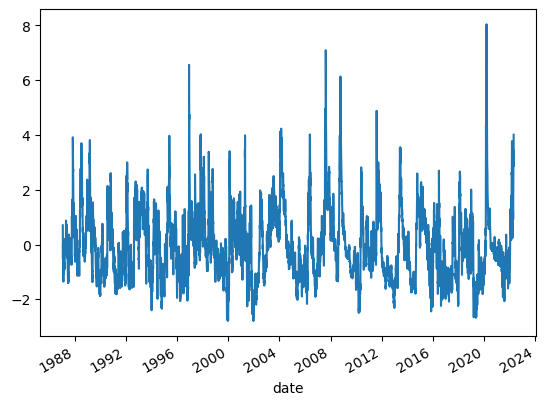

In [58]:
df.plot()

In [57]:
%matplotlib inline